# About Dataset

### INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### RESEARCH QUESTION
The aim of our study is to answer the below research questions: 

*Assume that all the assumptions are satisfied*

a) Does airline price depend upon the airline brand 

b) Develop a regression model for predicting flight prices and demonstrate its predictive capabilities by inputting a random sample for price prediction

### DATA COLLECTION AND METHODOLOGY
Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837&language=Python

Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

### DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

### FEATURES
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv(r"D:\Data_Analyst_duo\Level 2 20230727\Project\Clean_Dataset.csv")

In [63]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


There is no null values in dataset.

### A) Does price vary with Airlines?

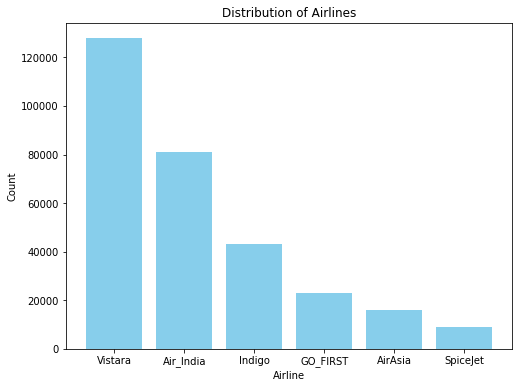

In [65]:
# Count the occurrences of each airline
airline_counts = df['airline'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(airline_counts.index, airline_counts.values, color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airlines')
plt.show()

Vistara boasts the highest number of flights, closely followed by Air India.

We must use ANOVA for dealing with this objective.

ANOVA (Analysis of Variance) is a statistical technique used to analyze the differences among group means in a sample. It assesses whether the means of two or more groups are statistically significantly different from each other. ANOVA is widely used in various fields, including experimental research, quality control, and social sciences, to determine whether there are significant differences among groups.

Why Use ANOVA for this Problem:

Multiple Airlines: In this problem, we are comparing the prices of airline tickets across multiple airlines (more than two). ANOVA is specifically designed for comparing means among three or more groups or categories. It allows you to assess whether there are significant differences in ticket prices across these various airlines.

Null Hypothesis (H0): There is no statistically significant difference in the average ticket prices among the different airlines.

Alternative Hypothesis (H1): There is a statistically significant difference in the average ticket prices among the different airlines.

In [66]:
from scipy.stats import f_oneway

# Group prices by airline
airline_groups = []
for airline in df['airline'].unique():
    airline_groups.append(df[df['airline'] == airline]['price'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*airline_groups)

# Set significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant difference in price among different airlines.")
else:
    print("There is no significant difference in price among different airlines.")

There is a significant difference in price among different airlines.


### b) Develop a regression model for predicting flight prices and demonstrate its predictive capabilities by inputting a random sample for price prediction

In [67]:
# Assuming you have a DataFrame called 'df' with these categorical columns
categorical_columns = ["airline","source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

# Use pd.get_dummies() to create one-hot encoding for each categorical column
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)

# One-hot encoding is a technique used in machine learning and data preprocessing to convert categorical data 
# into a binary (0 or 1) format. It's commonly used when you have categorical variables that are not ordinal in nature. 
# Each category is represented by a binary column, and only one of these columns is "hot" (set to 1) at a time, indicating 
# the category for that particular data point.

In [68]:
one_hot_encoded_df.head()

,flight,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,SG-8709,2.17,1,5953,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,SG-8157,2.33,1,5953,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,I5-764,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,UK-995,2.25,1,5955,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,UK-963,2.33,1,5955,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [69]:
# Drop airlineflight column
one_hot_encoded_df.drop('flight', axis=1, inplace=True)

In [70]:
one_hot_encoded_df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [71]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = one_hot_encoded_df.drop('price', axis=1)
y = one_hot_encoded_df['price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train and y_train for training, and X_test and y_test for testing

In [72]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9113048763794771


In [80]:
# Define a dictionary with feature names and values
sample_data = {
    'duration': 2.50,               
    'days_left': 2,                 
    'airline_AirAsia': 0,           
    'airline_Air_India': 0,
    'airline_GO_FIRST': 0,
    'airline_Indigo': 0,
    'airline_SpiceJet': 0,
    'airline_Vistara': 1,
    'source_city_Bangalore': 1,
    'source_city_Chennai': 0,
    'source_city_Delhi': 0,
    'source_city_Hyderabad': 0,
    'source_city_Kolkata': 0,
    'source_city_Mumbai': 0,
    'departure_time_Afternoon': 0,
    'departure_time_Early_Morning': 1,
    'departure_time_Evening': 0,
    'departure_time_Late_Night': 0,
    'departure_time_Morning': 0,
    'departure_time_Night': 0,
    'stops_one': 1,
    'stops_two_or_more': 0,
    'stops_zero': 0,
    'arrival_time_Afternoon': 1,
    'arrival_time_Early_Morning': 0,
    'arrival_time_Evening': 0,
    'arrival_time_Late_Night': 0,
    'arrival_time_Morning': 0,
    'arrival_time_Night': 0,
    'destination_city_Bangalore': 1,
    'destination_city_Chennai': 0,
    'destination_city_Delhi': 0,
    'destination_city_Hyderabad': 0,
    'destination_city_Kolkata': 0,
    'destination_city_Mumbai': 0,
    'class_Business': 0,             # Replace with the appropriate one-hot encoded value
    'class_Economy': 1,
}

# Convert the sample data into a DataFrame
sample_df = pd.DataFrame([sample_data])

# Make a price prediction using the trained model
predicted_price = model.predict(sample_df)

# Print the predicted price
print("Predicted Price:", predicted_price[0])

Predicted Price: 12371.064453125
